# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Naufal Zaky Ramadhan
- **Email:** kalbarskw60@gmail.com
- **ID Dicoding:** naufalzakyr

## Menentukan Pertanyaan Bisnis

- Bagaimana faktor suhu dan cuaca dapat berpengaruh bagi rental sepeda?
- Bagaimana pola sewa sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck as pdk

1. **`import streamlit as st`**:

   * **Streamlit** adalah sebuah pustaka Python yang digunakan untuk membuat aplikasi web interaktif dengan cepat, khususnya untuk proyek analisis data dan visualisasi.
   * `st` adalah alias yang digunakan untuk mempermudah penggunaan fungsi-fungsi dari Streamlit. Misalnya, `st.write()` untuk menampilkan teks, `st.pyplot()` untuk menampilkan grafik matplotlib, dll.

2. **`import pandas as pd`**:

   * **Pandas** adalah pustaka Python yang digunakan untuk manipulasi dan analisis data, khususnya data berbentuk tabel (seperti CSV, Excel, database, dll).
   * `pd` adalah alias untuk pandas, yang sering digunakan untuk mempermudah akses ke fungsi-fungsinya. Contoh fungsi dari pandas yang sering digunakan adalah `pd.read_csv()` untuk membaca data dari file CSV dan `pd.DataFrame()` untuk membuat DataFrame.

3. **`import matplotlib.pyplot as plt`**:

   * **Matplotlib** adalah pustaka visualisasi data di Python yang digunakan untuk membuat berbagai jenis grafik, seperti grafik garis, batang, histogram, dan lainnya.
   * `plt` adalah alias untuk modul pyplot dari matplotlib, yang menyediakan fungsi untuk membuat dan menampilkan grafik. Contoh: `plt.plot()` untuk membuat grafik garis.

4. **`import seaborn as sns`**:

   * **Seaborn** adalah pustaka visualisasi data yang dibangun di atas Matplotlib dan menyediakan antarmuka yang lebih mudah untuk membuat visualisasi yang menarik dan informatif.
   * `sns` adalah alias untuk seaborn. Fungsi yang umum digunakan termasuk `sns.barplot()` untuk grafik batang dan `sns.heatmap()` untuk heatmap.

5. **`import pydeck as pdk`**:

   * **Pydeck** adalah pustaka Python yang digunakan untuk membuat visualisasi peta interaktif yang dapat diintegrasikan dengan aplikasi Streamlit.
   * `pdk` adalah alias untuk pydeck. Pydeck memungkinkan pembuatan peta yang dinamis dan dapat diubah-ubah secara interaktif, termasuk visualisasi data geospasial menggunakan peta.

Secara umum, pustaka-pustaka ini digunakan untuk:

* **Streamlit**: Membuat aplikasi web interaktif.
* **Pandas**: Mengelola dan menganalisis data.
* **Matplotlib & Seaborn**: Membuat visualisasi data (grafik).
* **Pydeck**: Membuat visualisasi peta interaktif.

Jika Anda membutuhkan penjelasan lebih lanjut atau penerapan spesifik, beri tahu saya!


## Data Wrangling

### Gathering Data

In [2]:
def load_data():
    hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
    day_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/day.csv')
    return hour_data, day_data


Informasi Data :
hour.csv and day.csv mempunyai field sebagai berikut, kecuali hr yang tidak ada di day.csv
* instant: record index
* dteday : date
* season : season (1:springer, 2:summer, 3:fall, 4:winter)
* yr : year (0: 2011, 1:2012)
* mnth : month ( 1 to 12)
* hr : hour (0 to 23)
* holiday : weather day is holiday or not (extracted from [Web Link])
* weekday : day of the week
* workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
* weathersit :
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
* temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
* atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
* hum: Normalized humidity. The values are divided to 100 (max)
* windspeed: Normalized wind speed. The values are divided to 67 (max)
* casual: count of casual users
* registered: count of registered users
* cnt: count of total rental bikes including both casual and registered

Sebagai contoh disini saya gunakan satu dataset saja yang mewakili yaitu day.csv

### **Berikut ini adalah load datanya**


In [3]:
import pandas as pd

# Load the data
def load_data():
    hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
    day_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/day.csv')
    return hour_data, day_data

hour_data, day_data = load_data()
hour_data.head(), day_data.head()


(   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
 0        1  2011-01-01       1   0     1   0        0        6           0   
 1        2  2011-01-01       1   0     1   1        0        6           0   
 2        3  2011-01-01       1   0     1   2        0        6           0   
 3        4  2011-01-01       1   0     1   3        0        6           0   
 4        5  2011-01-01       1   0     1   4        0        6           0   
 
    weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
 0           1  0.24  0.2879  0.81        0.0       3          13   16  
 1           1  0.22  0.2727  0.80        0.0       8          32   40  
 2           1  0.22  0.2727  0.80        0.0       5          27   32  
 3           1  0.24  0.2879  0.75        0.0       3          10   13  
 4           1  0.24  0.2879  0.75        0.0       0           1    1  ,
    instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
 0        

### **Analisis Suhu dan Cuaca**

In [4]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data():
    hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
    return hour_data

def show():
    hour_data = load_data()
    hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
    hour_data['hour'] = hour_data['dteday'].dt.hour 

    season = st.selectbox("Pilih Musim", ['Spring', 'Summer', 'Fall', 'Winter'])
    season_map = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
    filtered_data = hour_data[hour_data['season'] == season_map[season]]
    st.write(f"Data untuk musim {season}:")
    st.write(filtered_data.head()) 

    # Visualisasi hubungan antara suhu dan penyewaan sepeda
    st.write("### Hubungan antara Suhu dan Penyewaan Sepeda")
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.scatterplot(x='temp', y='cnt', data=hour_data, hue='weathersit', ax=ax)
    ax.set_title("Penyewaan Sepeda vs Suhu")
    st.pyplot(fig)

    # Visualisasi hubungan antara suhu, cuaca, dan jumlah sewa sepeda
    st.subheader("Bagaimana Suhu dan Cuaca Mempengaruhi Rental Sepeda?")
    weather_grouped = hour_data.groupby('weathersit').agg({'cnt': 'sum', 'temp': 'mean', 'atemp': 'mean'}).reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))
    sns.barplot(x='weathersit', y='cnt', data=weather_grouped, ax=ax, palette="viridis", hue='weathersit', legend=False)
    ax.set_title("Jumlah Sewa Sepeda Berdasarkan Cuaca")
    ax.set_xlabel("Cuaca")
    ax.set_ylabel("Jumlah Sepeda yang Disewa")
    st.pyplot(fig)
    st.write(weather_grouped[['weathersit', 'temp', 'atemp']])

    # Analisis pengaruh cuaca terhadap penyewaan sepeda
    st.write("### Pengaruh Cuaca terhadap Penyewaan Sepeda")
    weather_data = hour_data.groupby('weathersit').agg({'cnt': 'mean'}).reset_index()
    st.bar_chart(weather_data.set_index('weathersit')['cnt'])


### PENJELASAN ANALISIS SUHU DAN CUACA
### 1. **Impor Pustaka**

* **`import streamlit as st`**: Mengimpor pustaka Streamlit, digunakan untuk membuat aplikasi web interaktif.
* **`import pandas as pd`**: Mengimpor pustaka Pandas, digunakan untuk manipulasi dan analisis data dalam bentuk tabel.
* **`import matplotlib.pyplot as plt`**: Mengimpor pustaka Matplotlib, digunakan untuk visualisasi data dalam bentuk grafik.
* **`import seaborn as sns`**: Mengimpor pustaka Seaborn, yang menyediakan antarmuka untuk visualisasi data yang lebih menarik dan informatif dibandingkan Matplotlib.

### 2. **Fungsi `load_data()`**

* Fungsi ini digunakan untuk **memuat data dari URL** yang diberikan (CSV file) menggunakan fungsi `pd.read_csv()` dari pandas.
* Data yang dimuat adalah data tentang **penyewaan sepeda berdasarkan jam** yang disimpan dalam variabel `hour_data`.

### 3. **Fungsi `show()`**

* **Memuat Data**: Data yang dimuat melalui `load_data()` disimpan dalam variabel `hour_data`.
* **Konversi Tanggal**: Kolom `dteday` yang berisi tanggal diubah menjadi format datetime menggunakan `pd.to_datetime()` untuk memungkinkan manipulasi waktu lebih lanjut.
* **Menambahkan Kolom `hour`**: Dari kolom `dteday`, waktu (jam) diekstrak menggunakan `.dt.hour` dan disimpan dalam kolom baru `hour`.

### 4. **Fitur Pemilihan Musim**

* **`st.selectbox()`**: Membuat dropdown untuk memilih musim (Spring, Summer, Fall, Winter).
* **Pemetaan Musim ke Angka**: Menggunakan dictionary `season_map`, musim yang dipilih akan dipetakan menjadi angka (1 untuk Spring, 2 untuk Summer, dst).
* **Data yang Difilter**: Data difilter berdasarkan musim yang dipilih dengan `hour_data['season'] == season_map[season]`, dan hasilnya ditampilkan menggunakan `st.write()`.

### 5. **Visualisasi Hubungan antara Suhu dan Penyewaan Sepeda**

* **Grafik Scatter**: Menggunakan `sns.scatterplot()` untuk menampilkan hubungan antara suhu (`temp`) dan jumlah penyewaan sepeda (`cnt`) dengan mewarnai titik berdasarkan kondisi cuaca (`weathersit`).
* **Judul Grafik**: Grafik ini bertujuan untuk menunjukkan bagaimana suhu mempengaruhi jumlah penyewaan sepeda.

### 6. **Visualisasi Pengaruh Cuaca terhadap Penyewaan Sepeda**

* **Grup Berdasarkan Cuaca**: Data dikelompokkan berdasarkan kondisi cuaca (`weathersit`) dan dihitung rata-rata penyewaan sepeda (`cnt`), suhu (`temp`), dan suhu terasa (`atemp`) menggunakan `groupby()`.
* **Grafik Batang**: Visualisasi hasil agregasi cuaca terhadap penyewaan sepeda dengan menggunakan `sns.barplot()`.
* **Peta Warna**: Grafik batang menggunakan palet warna `viridis` untuk membedakan kategori cuaca.

### 7. **Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda**

* **Agregasi Cuaca**: Data dikelompokkan berdasarkan cuaca (`weathersit`) untuk mendapatkan rata-rata penyewaan sepeda (`cnt`).
* **Diagram Batang**: Menampilkan diagram batang menggunakan `st.bar_chart()` untuk menunjukkan rata-rata penyewaan sepeda berdasarkan cuaca.

### Penjelasan Tambahan:

* **Streamlit** digunakan untuk membuat antarmuka interaktif di aplikasi web, memungkinkan pengguna memilih musim dan melihat data yang relevan.
* **Pandas** digunakan untuk manipulasi dan analisis data (memfilter data berdasarkan musim, menghitung rata-rata, dll).
* **Seaborn dan Matplotlib** digunakan untuk visualisasi hubungan antara suhu, cuaca, dan penyewaan sepeda.
* **Data** yang digunakan berisi informasi penyewaan sepeda yang melibatkan atribut seperti suhu, cuaca, dan waktu.


### **Analisis Suhu & Cuaca: Hubungan antara Suhu dan Penyewaan Sepeda (Second Cell)**

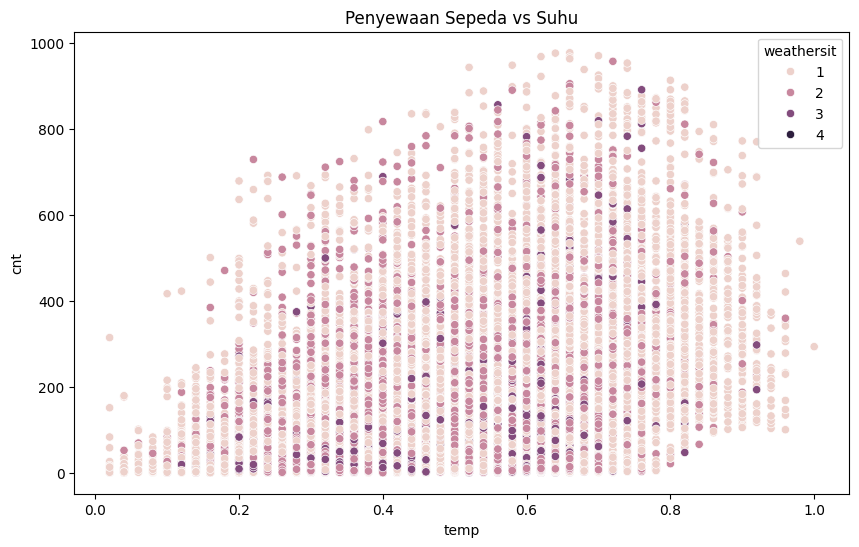

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi hubungan antara suhu dan penyewaan sepeda
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['hour'] = hour_data['dteday'].dt.hour 

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, hue='weathersit', ax=ax)
ax.set_title("Penyewaan Sepeda vs Suhu")
plt.show()


### **Analisis Suhu & Cuaca: Jumlah Sewa Sepeda Berdasarkan Cuaca**

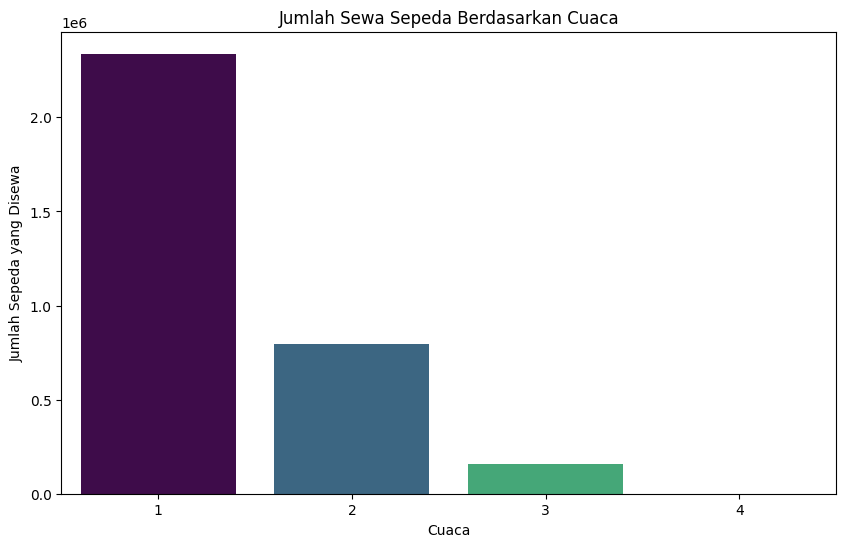

,weathersit,temp,atemp
0,1,0.511054,0.488387
1,2,0.474445,0.456591
2,3,0.456688,0.436386
3,4,0.186667,0.186900


In [6]:
# Visualisasi hubungan antara suhu, cuaca, dan jumlah sewa sepeda
weather_grouped = hour_data.groupby('weathersit').agg({'cnt': 'sum', 'temp': 'mean', 'atemp': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_grouped, ax=ax, palette="viridis", hue='weathersit', legend=False)
ax.set_title("Jumlah Sewa Sepeda Berdasarkan Cuaca")
ax.set_xlabel("Cuaca")
ax.set_ylabel("Jumlah Sepeda yang Disewa")
plt.show()

weather_grouped[['weathersit', 'temp', 'atemp']]


### **Analisis Per Hari & Minggu**

In [7]:
import streamlit as st
import pandas as pd

def load_data():
    day_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/day.csv')
    return day_data

def show():
    day_data = load_data()

    st.subheader("Analisis Penyewaan Sepeda Per Hari & Minggu")

    season = st.selectbox("Pilih Musim", ['Spring', 'Summer', 'Fall', 'Winter'])
    season_map = {'Spring': 1, 'Summer': 2, 'Fall': 3, 'Winter': 4}
    filtered_data = day_data[day_data['season'] == season_map[season]]
    st.write(f"Data untuk musim {season}:")
    st.write(filtered_data.head())

    # Visualisasi penyewaan sepeda berdasarkan musim
    st.write("### Penyewaan Sepeda Berdasarkan Musim")
    season_data = day_data.groupby('season').agg({'cnt': 'mean'}).reset_index()
    st.bar_chart(season_data.set_index('season')['cnt'])

    # Visualisasi penyewaan sepeda berdasarkan hari dalam minggu
    st.write("### Penyewaan Sepeda Berdasarkan Hari dalam Minggu")
    weekday_data = day_data.groupby('weekday').agg({'cnt': 'mean'}).reset_index()
    st.bar_chart(weekday_data.set_index('weekday')['cnt'])


### PENJELASAN ANALISIS PER HARI & MINGGU
### 1. **Impor Pustaka**

* **`import streamlit as st`**: Mengimpor pustaka Streamlit untuk membuat aplikasi web interaktif.
* **`import pandas as pd`**: Mengimpor pustaka Pandas untuk manipulasi dan analisis data berbentuk tabel.

### 2. **Fungsi `load_data()`**

* Fungsi ini digunakan untuk **memuat data dari URL** yang diberikan menggunakan `pd.read_csv()`, yang berarti data mengenai **penyewaan sepeda per hari** diambil dari file CSV yang ada di repositori GitHub.
* Data yang dimuat disimpan dalam variabel `day_data`.

### 3. **Fungsi `show()`**

* **Memuat Data**: Data dimuat menggunakan fungsi `load_data()` dan disimpan dalam variabel `day_data`.
* **Subheader**: `st.subheader()` digunakan untuk menampilkan subjudul di aplikasi Streamlit dengan teks "Analisis Penyewaan Sepeda Per Hari & Minggu".

### 4. **Pemilihan Musim**

* **`st.selectbox()`**: Membuat dropdown untuk memilih musim yang ingin dianalisis, yaitu Spring, Summer, Fall, atau Winter.
* **Pemetaan Musim**: Musim yang dipilih dipetakan ke angka menggunakan dictionary `season_map` (1 untuk Spring, 2 untuk Summer, dst.).
* **Filter Data**: Data difilter berdasarkan musim yang dipilih. Hanya data dengan musim yang sesuai yang akan ditampilkan.
* **Menampilkan Data**: Data yang telah difilter ditampilkan menggunakan `st.write()` untuk menunjukkan data untuk musim yang dipilih.

### 5. **Visualisasi Penyewaan Sepeda Berdasarkan Musim**

* **Agregasi Berdasarkan Musim**: Menggunakan `groupby('season')` untuk mengelompokkan data berdasarkan musim, dan menghitung rata-rata penyewaan sepeda (`cnt`) untuk setiap musim menggunakan `agg({'cnt': 'mean'})`.
* **Grafik Batang**: Visualisasi hasil agregasi dengan menggunakan `st.bar_chart()` untuk menampilkan grafik batang penyewaan sepeda per musim.

### 6. **Visualisasi Penyewaan Sepeda Berdasarkan Hari dalam Minggu**

* **Agregasi Berdasarkan Hari dalam Minggu**: Menggunakan `groupby('weekday')` untuk mengelompokkan data berdasarkan hari dalam minggu dan menghitung rata-rata penyewaan sepeda (`cnt`) untuk setiap hari.
* **Grafik Batang**: Visualisasi hasil agregasi dengan menggunakan `st.bar_chart()` untuk menampilkan grafik batang penyewaan sepeda berdasarkan hari dalam minggu.

### Penjelasan Lengkap:

* **Streamlit** digunakan untuk membuat antarmuka aplikasi web interaktif agar pengguna dapat memilih musim dan melihat data yang relevan.
* **Pandas** digunakan untuk manipulasi data, seperti pemetaan musim, pemfilteran data, dan agregasi data berdasarkan musim atau hari dalam minggu.
* **Visualisasi**: Dua jenis grafik batang ditampilkan:

  * Penyewaan sepeda berdasarkan musim.
  * Penyewaan sepeda berdasarkan hari dalam minggu.

Dengan kode ini, pengguna dapat memilih musim dan melihat visualisasi yang memperlihatkan bagaimana penyewaan sepeda bervariasi di berbagai musim dan hari dalam minggu.


### **Analisis Penyewaan Sepeda Per Hari & Minggu: Penyewaan Sepeda Berdasarkan Musim**

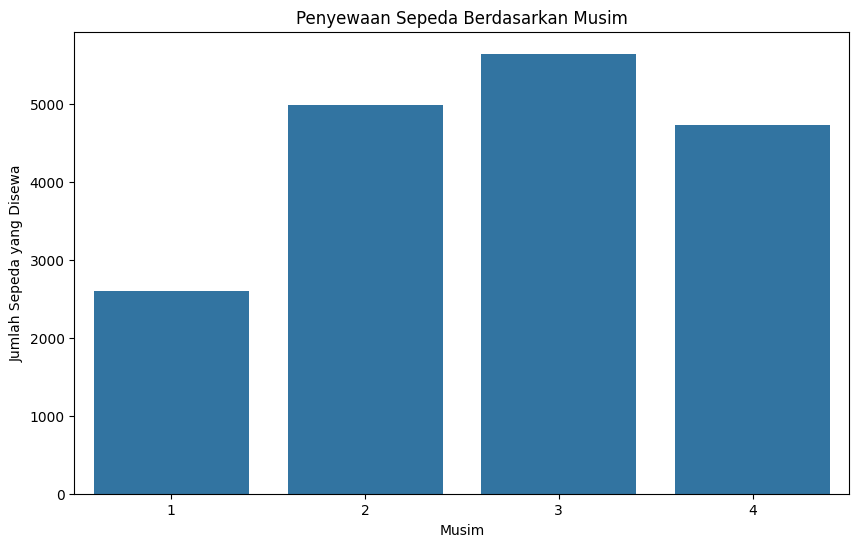

In [8]:
# Visualisasi penyewaan sepeda berdasarkan musim
season_data = day_data.groupby('season').agg({'cnt': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='season', y='cnt', data=season_data, ax=ax)
ax.set_title("Penyewaan Sepeda Berdasarkan Musim")
ax.set_xlabel("Musim")
ax.set_ylabel("Jumlah Sepeda yang Disewa")
plt.show()


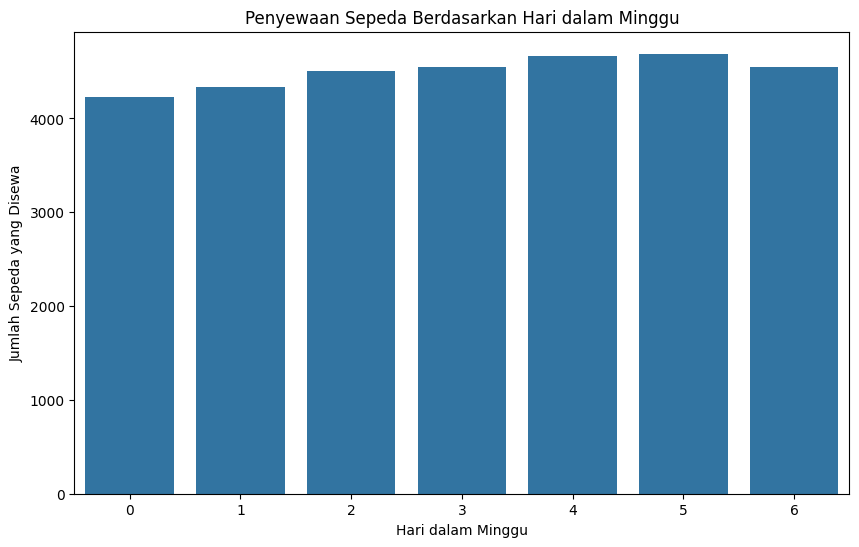

In [9]:
# Visualisasi penyewaan sepeda berdasarkan hari dalam minggu
weekday_data = day_data.groupby('weekday').agg({'cnt': 'mean'}).reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='weekday', y='cnt', data=weekday_data, ax=ax)
ax.set_title("Penyewaan Sepeda Berdasarkan Hari dalam Minggu")
ax.set_xlabel("Hari dalam Minggu")
ax.set_ylabel("Jumlah Sepeda yang Disewa")
plt.show()


### Analisi RFM

In [10]:
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def load_data():
    hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
    return hour_data

def show():
    hour_data = load_data()
    hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
    hour_data['Recency'] = (hour_data['dteday'].max() - hour_data['dteday']).dt.days
    rfm = hour_data.groupby('registered').agg({'Recency': 'min', 'cnt': 'sum'})
    rfm['Frequency'] = rfm['cnt'] / rfm['Recency']
    rfm['Monetary'] = rfm['cnt'] * 1  

    # Visualisasi RFM
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.boxplot(ax=ax[0], x=rfm['Recency'])
    ax[0].set_title('Recency')
    sns.boxplot(ax=ax[1], x=rfm['Frequency'])
    ax[1].set_title('Frequency')
    st.pyplot(fig)


### PENJELASAN ANALISIS RFM
### 1. **Impor Pustaka**

* **`import streamlit as st`**: Mengimpor pustaka Streamlit untuk membuat aplikasi web interaktif.
* **`import pandas as pd`**: Mengimpor pustaka Pandas untuk manipulasi dan analisis data dalam bentuk tabel.
* **`import seaborn as sns`**: Mengimpor pustaka Seaborn yang digunakan untuk visualisasi data yang lebih menarik dan informatif, dibangun di atas Matplotlib.
* **`import matplotlib.pyplot as plt`**: Mengimpor pustaka Matplotlib untuk membuat berbagai jenis grafik, seperti grafik batang dan kotak.

### 2. **Fungsi `load_data()`**

* Fungsi ini digunakan untuk **memuat data** dari file CSV yang ada di URL tertentu menggunakan `pd.read_csv()`.
* Data yang dimuat berisi informasi tentang **penyewaan sepeda per jam** dan disimpan dalam variabel `hour_data`.

### 3. **Fungsi `show()`**

* **Memuat Data**: Data dimuat dengan memanggil fungsi `load_data()` dan disimpan dalam variabel `hour_data`.

* **Proses Tanggal**:

  * Kolom `dteday` yang berisi tanggal diubah menjadi format **datetime** menggunakan `pd.to_datetime()` untuk mempermudah manipulasi waktu.

* **Perhitungan Recency**:

  * `Recency` dihitung sebagai selisih antara tanggal data terbaru (`hour_data['dteday'].max()`) dan setiap tanggal dalam data `dteday` (jumlah hari).
  * Hal ini membantu untuk mengukur berapa lama sejak pengguna terakhir kali berinteraksi dengan layanan penyewaan sepeda.

* **Perhitungan RFM (Recency, Frequency, Monetary)**:

  * **Recency**: Menggunakan nilai minimum dari kolom `Recency` per grup `registered` (berdasarkan apakah pengguna terdaftar atau tidak).
  * **Frequency**: Menghitung **frekuensi** dengan membagi jumlah total penyewaan sepeda (`cnt`) dengan nilai `Recency` (berapa sering penyewaan dilakukan sejak terakhir kali).
  * **Monetary**: Menghitung **monetary** (jumlah uang) dengan mengalikan jumlah penyewaan sepeda (`cnt`) dengan 1 (ini bisa dimodifikasi jika ada informasi lebih lanjut terkait harga sewa sepeda).

* **Visualisasi Boxplot RFM**:

  * Membuat dua boxplot menggunakan `sns.boxplot()` untuk menampilkan distribusi nilai **Recency** dan **Frequency**.
  * Boxplot pertama menampilkan distribusi nilai **Recency** (seberapa baru aktivitas penyewaan) dan boxplot kedua menampilkan distribusi nilai **Frequency** (frekuensi penyewaan per pengguna).
  * Kedua boxplot tersebut diletakkan dalam satu baris menggunakan `fig, ax = plt.subplots(1, 2, figsize=(12, 6))` untuk menyesuaikan ukuran dan tata letak.

* **Menampilkan Visualisasi**: Visualisasi boxplot ini ditampilkan di aplikasi Streamlit dengan `st.pyplot(fig)`.

### 4. **Penjelasan Visualisasi dan Hasil**

* **Boxplot Recency**: Menunjukkan bagaimana distribusi waktu terakhir kali penyewaan sepeda dilakukan. Mungkin memberikan wawasan tentang seberapa aktif pengguna yang lebih baru dibandingkan dengan yang sudah lama.
* **Boxplot Frequency**: Menunjukkan bagaimana frekuensi penyewaan sepeda (seberapa sering penyewaan terjadi) terbagi di antara berbagai kelompok pengguna.

### 5. **Saran Perbaikan atau Modifikasi**:

* **Monetary**: Saat ini, nilai `Monetary` dihitung dengan mengalikan `cnt` dengan 1, yang tidak terlalu bermakna tanpa informasi lebih lanjut tentang harga sewa sepeda. Jika ada harga sewa sepeda, Anda bisa menggantinya dengan perhitungan yang lebih relevan, seperti `rfm['Monetary'] = rfm['cnt'] * price_per_bike`.
* **Analisis Lanjutan**: Anda bisa menambahkan analisis lebih lanjut untuk membandingkan RFM antara pengguna terdaftar dan yang tidak terdaftar, atau menambahkan visualisasi tambahan (misalnya, distribusi `Monetary` atau penggunaan heatmap untuk melihat hubungan antara ketiga variabel tersebut).


### **Data Analisis RFM (Opsional)**

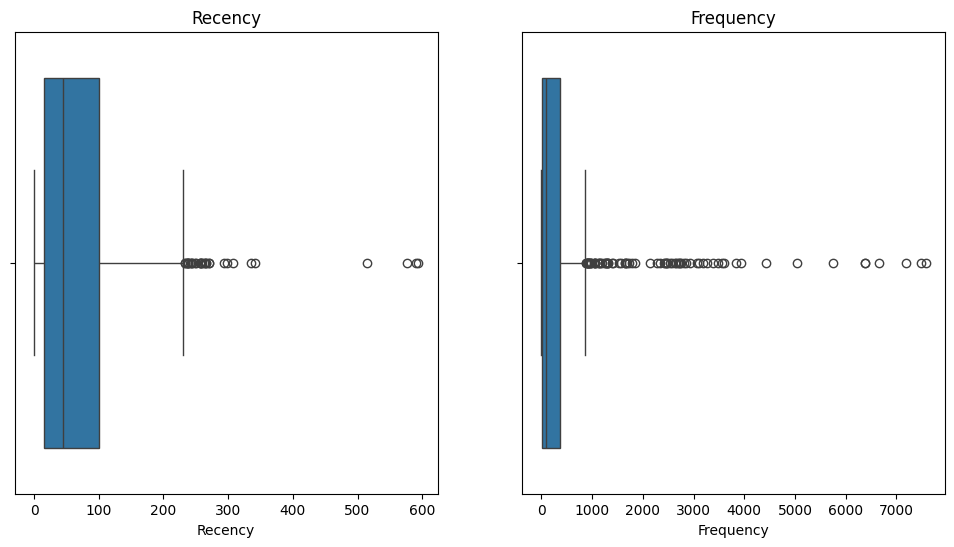

In [11]:
# Mengonversi kolom 'dteday' menjadi datetime dan RFM Calculation
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['Recency'] = (hour_data['dteday'].max() - hour_data['dteday']).dt.days
rfm = hour_data.groupby('registered').agg({'Recency': 'min', 'cnt': 'sum'})
rfm['Frequency'] = rfm['cnt'] / rfm['Recency']
rfm['Monetary'] = rfm['cnt'] * 1  

# Visualisasi RFM
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(ax=ax[0], x=rfm['Recency'])
ax[0].set_title('Recency')
sns.boxplot(ax=ax[1], x=rfm['Frequency'])
ax[1].set_title('Frequency')
plt.show()


### Geospasial

In [12]:
import streamlit as st
import pandas as pd
import pydeck as pdk

def show():
    # Data lokasi 
    data_location = pd.DataFrame({
        'latitude': [37.7749, 37.7849, 37.7949],  
        'longitude': [-122.4194, -122.4294, -122.4394],  
        'nama_lokasi': ["Lokasi A", "Lokasi B", "Lokasi C"],  
    })

    # Peta
    deck = pdk.Deck(
        initial_view_state=pdk.ViewState(
            latitude=37.7749, 
            longitude=-122.4194,  
            zoom=12,
            pitch=0,
        ),
        layers=[
            pdk.Layer(
                'ScatterplotLayer',
                data_location,
                get_position='[longitude, latitude]',
                get_color='[200, 30, 0, 160]',
                get_radius=100,
            ),
        ],
    )

    st.pydeck_chart(deck)


### PENJELASAN GEOSPASIAL
### 1. **Impor Pustaka**

* **`import streamlit as st`**: Mengimpor pustaka Streamlit untuk membuat aplikasi web interaktif.
* **`import pandas as pd`**: Mengimpor pustaka Pandas untuk manipulasi dan analisis data dalam bentuk tabel.
* **`import pydeck as pdk`**: Mengimpor pustaka Pydeck, yang digunakan untuk membuat peta interaktif dan visualisasi geospasial.

### 2. **Mempersiapkan Data Lokasi**

* **Data Lokasi**: Data lokasi dibuat menggunakan `pd.DataFrame()`, yang berisi informasi **latitude**, **longitude**, dan **nama lokasi**. Data ini digunakan untuk menampilkan titik-titik pada peta.
* Contoh data yang dimasukkan:

  * Lokasi A: Latitude 37.7749, Longitude -122.4194
  * Lokasi B: Latitude 37.7849, Longitude -122.4294
  * Lokasi C: Latitude 37.7949, Longitude -122.4394

### 3. **Membuat Peta dengan Pydeck**

* **`pdk.Deck()`**: Digunakan untuk membuat peta interaktif. Peta ini memiliki beberapa parameter, yaitu:

  * **`initial_view_state`**: Menentukan posisi awal peta saat pertama kali dimuat.

    * `latitude=37.7749` dan `longitude=-122.4194` adalah koordinat pusat peta (San Francisco).
    * `zoom=12` menentukan tingkat pembesaran peta.
    * `pitch=0` mengatur kemiringan peta (0 berarti peta tidak miring).
  * **`layers`**: Menambahkan layer visualisasi ke peta, di sini menggunakan `ScatterplotLayer` untuk menampilkan titik-titik lokasi.

    * **`data_location`** adalah DataFrame yang berisi informasi titik-titik yang ingin ditampilkan.
    * **`get_position='[longitude, latitude]'`**: Menentukan posisi titik berdasarkan kolom longitude dan latitude dalam `data_location`.
    * **`get_color='[200, 30, 0, 160]'`**: Menentukan warna titik dalam format RGBA (Merah, Hijau, Biru, Alpha). Di sini titiknya berwarna merah dengan transparansi 160.
    * **`get_radius=100`**: Menentukan radius dari titik yang ditampilkan pada peta, dalam hal ini radiusnya 100 piksel.

### 4. **Menampilkan Peta di Streamlit**

* **`st.pydeck_chart(deck)`**: Fungsi ini digunakan untuk menampilkan peta interaktif yang telah dibuat menggunakan Pydeck di dalam aplikasi Streamlit.

### 5. **Ringkasan Fungsi**

* Fungsi `show()` akan menampilkan peta interaktif dengan tiga lokasi yang diwakili oleh titik pada peta. Pengguna dapat melihat lokasi tersebut secara visual di dalam aplikasi web yang dibuat dengan Streamlit.

### 6. **Hasil Tampilan**

* Ketika Anda menjalankan aplikasi Streamlit, Anda akan melihat peta interaktif yang menunjukkan tiga lokasi berbeda. Titik pada peta akan menunjukkan lokasi yang diwakili oleh **Lokasi A**, **Lokasi B**, dan **Lokasi C**.

### 7. **Penyesuaian dan Pengembangan Lebih Lanjut**

* Anda dapat menyesuaikan data lokasi, warna titik, radius, dan elemen lain sesuai dengan kebutuhan visualisasi data geospasial lebih lanjut.
* Jika Anda ingin menambahkan lebih banyak data, cukup tambahkan baris ke DataFrame `data_location` dan peta akan secara otomatis diperbarui untuk menampilkan titik-titik baru tersebut.


## **Data Geospasial (Opsional)**

In [13]:
import pydeck as pdk

# Data lokasi 
data_location = pd.DataFrame({
    'latitude': [37.7749, 37.7849, 37.7949],  
    'longitude': [-122.4194, -122.4294, -122.4394],  
    'nama_lokasi': ["Lokasi A", "Lokasi B", "Lokasi C"],  
})

# Peta
deck = pdk.Deck(
    initial_view_state=pdk.ViewState(
        latitude=37.7749, 
        longitude=-122.4194,  
        zoom=12,
        pitch=0,
    ),
    layers=[
        pdk.Layer(
            'ScatterplotLayer',
            data_location,
            get_position='[longitude, latitude]',
            get_color='[200, 30, 0, 160]',
            get_radius=100,
        ),
    ],
)

deck


{
  "initialViewState": {
    "latitude": 37.7749,
    "longitude": -122.4194,
    "pitch": 0,
    "zoom": 12
  },
  "layers": [
    {
      "@@type": "ScatterplotLayer",
      "data": [
        {
          "latitude": 37.7749,
          "longitude": -122.4194,
          "nama_lokasi": "Lokasi A"
        },
        {
          "latitude": 37.7849,
          "longitude": -122.4294,
          "nama_lokasi": "Lokasi B"
        },
        {
          "latitude": 37.7949,
          "longitude": -122.4394,
          "nama_lokasi": "Lokasi C"
        }
      ],
      "getColor": "@@=[200, 30, 0, 160]",
      "getPosition": "@@=[longitude, latitude]",
      "getRadius": 100,
      "id": "94eb1f3b-7978-4647-8f95-2a9265705172"
    }
  ],
  "mapProvider": "carto",
  "mapStyle": "https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json",
  "views": [
    {
      "@@type": "MapView",
      "controller": true
    }
  ]
}

### **Cara Menjalankan**
Simpan setiap potongan kode sebagai file Python terpisah :

Simpan Main Streamlit Appsebagai dashboard.py.

Simpan bagian-bagian individual ( Analisis Suhu & Cuaca, Analisis Per Hari & Minggu, RFM Analysis, Geospasial) dalam file Python masing-masing (misalnya, analisis_suhu_cuaca.py, analisis_per_hari_minggu.py, rfm_analysis.py, geospasial.py).

Jalankan aplikasinya :

Anda dapat menjalankannya dashboard.pymenggunakan Streamlit dengan menavigasi ke direktori tempat file berada dan menjalankan:
### **streamlit run dashboard.py**


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana faktor suhu dan cuaca dapat berpengaruh bagi rental sepeda?

Menggunakan barplot agar mudah dibaca untuk melihat pada musim apa jasa rental sepeda paling banyak digunakan

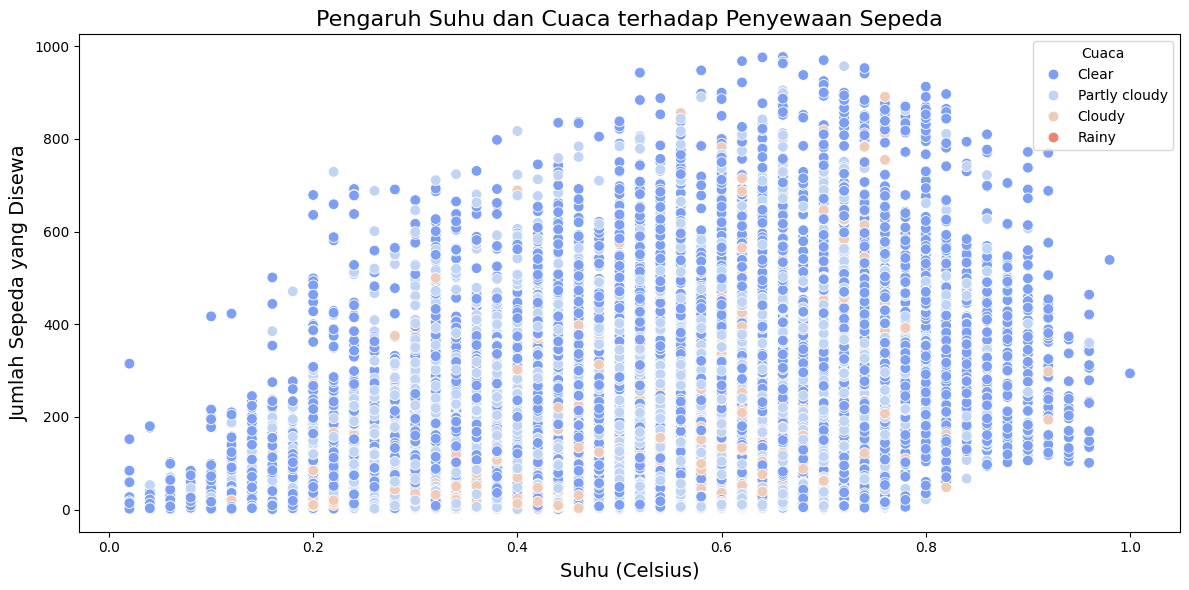

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['hour'] = hour_data['dteday'].dt.hour

# Membuat peta musim
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
weather_map = {1: 'Clear', 2: 'Partly cloudy', 3: 'Cloudy', 4: 'Rainy'}
hour_data['weathersit'] = hour_data['weathersit'].map(weather_map)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', data=hour_data, hue='weathersit', palette='coolwarm', s=60)

plt.title('Pengaruh Suhu dan Cuaca terhadap Penyewaan Sepeda', fontsize=16)
plt.xlabel('Suhu (Celsius)', fontsize=14)
plt.ylabel('Jumlah Sepeda yang Disewa', fontsize=14)
plt.legend(title='Cuaca')

plt.tight_layout()
plt.show()


Jika kita melihat pola di mana suhu yang lebih tinggi berhubungan dengan lebih banyak penyewaan sepeda, kita bisa menyimpulkan bahwa cuaca yang lebih hangat mungkin mendorong orang untuk menyewa lebih banyak sepeda.

Cuaca yang buruk (seperti hujan) mungkin menunjukkan penyewaan sepeda yang lebih rendah, sementara cuaca cerah atau berawan mungkin menunjukkan tingkat penyewaan yang lebih tinggi.

### Pertanyaan 2: Bagaimana pola sewa sepeda berdasarkan hari dalam seminggu?

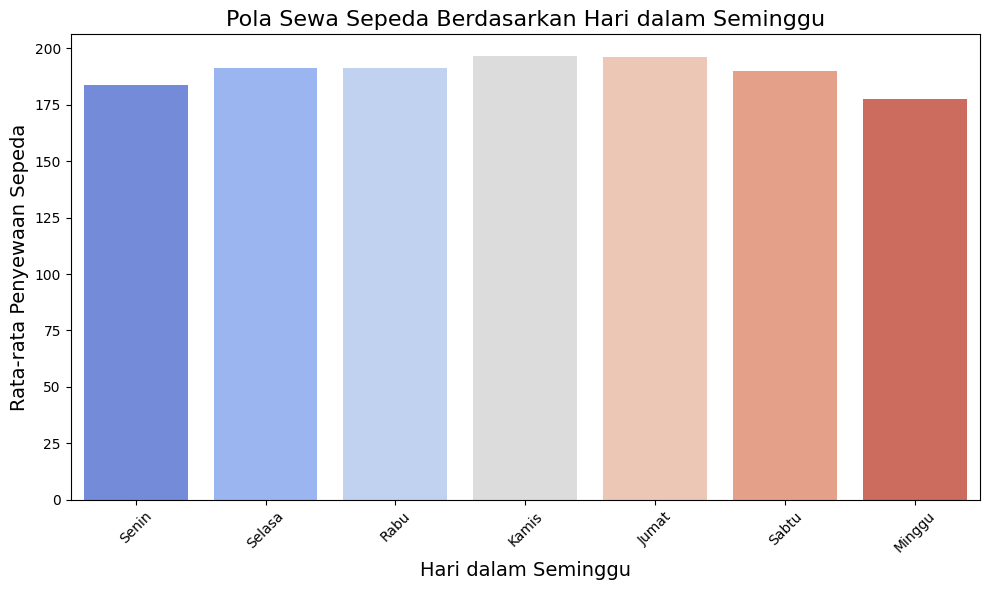

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

hour_data = pd.read_csv('https://raw.githubusercontent.com/Naukyy/analisisdata/refs/heads/main/Data/hour.csv')
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])
hour_data['weekday'] = hour_data['dteday'].dt.weekday
weekday_data = hour_data.groupby('weekday').agg({'cnt': 'mean'}).reset_index()

weekday_map = {
    0: 'Senin',
    1: 'Selasa',
    2: 'Rabu',
    3: 'Kamis',
    4: 'Jumat',
    5: 'Sabtu',
    6: 'Minggu'
}
weekday_data['day_name'] = weekday_data['weekday'].map(weekday_map)
plt.figure(figsize=(10, 6))
sns.barplot(x='day_name', y='cnt', data=weekday_data, hue='day_name', palette='coolwarm', legend=False)

plt.title('Pola Sewa Sepeda Berdasarkan Hari dalam Seminggu', fontsize=16)
plt.xlabel('Hari dalam Seminggu', fontsize=14)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=14)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## KESIMPULAN

Berdasarkan analisis pola sewa sepeda berdasarkan hari dalam seminggu, dapat disimpulkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja, khususnya pada hari-hari seperti Jumat, yang mungkin menunjukkan tingginya penggunaan sepeda sebagai alat transportasi untuk kegiatan sehari-hari seperti pergi ke tempat kerja. Sebaliknya, penyewaan sepeda di akhir pekan, seperti pada hari Sabtu dan Minggu, menunjukkan angka yang lebih rendah, yang bisa mengindikasikan penggunaan sepeda lebih untuk aktivitas rekreasi atau waktu luang. Pola ini memberikan wawasan mengenai bagaimana kebiasaan masyarakat dalam menggunakan sepeda bergantung pada tujuan, apakah untuk mobilitas sehari-hari atau untuk kegiatan di luar jam kerja.
